In [11]:
import pandas as pd

# Load the dataset
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
df = pd.read_csv(url)

# Display first few rows and info
print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     528 non-null    object 
 1   Year                     528 non-null    int64  
 2   Month                    528 non-null    object 
 3   Recession                528 non-null    int64  
 4   Consumer_Confidence      528 non-null    float64
 5   Seasonality_Weight       528 non-null    float64
 6   Price                    528 non-null    float64
 7   Advertising_Expenditure  528 non-null    int64  
 8   Competition              528 non-null    int64  
 9   GDP                      528 non-null    float64
 10  Growth_Rate              528 non-null    float64
 11  unemployment_rate        528 non-null    float64
 12  Automobile_Sales         528 non-null    float64
 13  Vehicle_Type             528 non-null    object 
 14  City                     5

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


## Part 1

Task 1.1: Line chart - Automobile Sales Yearly Trend

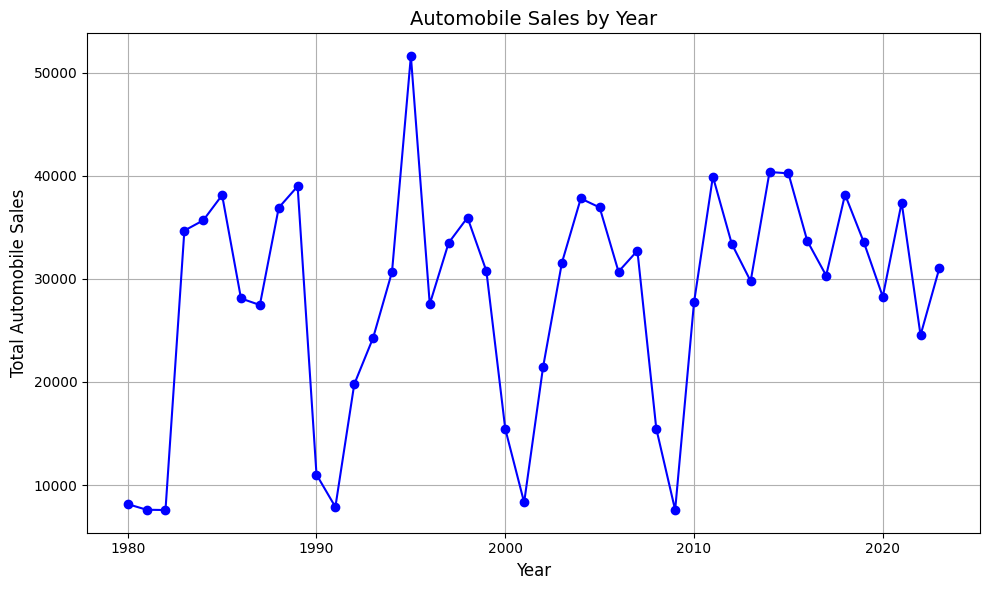

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
df = pd.read_csv(url)

# Group by year and sum automobile sales
yearly_sales = df.groupby("Year")["Automobile_Sales"].sum().reset_index()

# Plot line chart
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales["Year"], yearly_sales["Automobile_Sales"], marker='o', linestyle='-', color='blue')
plt.title("Automobile Sales by Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Automobile Sales", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig("Line_Plot_1.png")  # Save the plot as required
plt.show()


Task 1.2: Sales Trends by Vehicle Type During Recessions

<Figure size 1200x600 with 0 Axes>

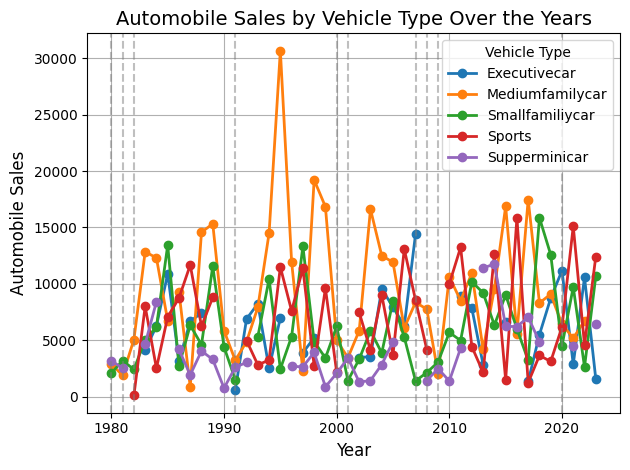

In [13]:
# Task 1.2: Sales Trends by Vehicle Type During Recessions

# Group data by Year and Vehicle_Type
vehicle_sales = df.groupby(['Year', 'Vehicle_Type'])['Automobile_Sales'].sum().unstack()

# Plot the line chart
plt.figure(figsize=(12, 6))
vehicle_sales.plot(marker='o', linewidth=2)
plt.title("Automobile Sales by Vehicle Type Over the Years", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Automobile Sales", fontsize=12)
plt.grid(True)

# Highlight known recession years
recession_years = [1980, 1981, 1982, 1991, 2000, 2001, 2007, 2008, 2009, 2020]
for year in recession_years:
    plt.axvline(x=year, color='gray', linestyle='--', alpha=0.5)

plt.legend(title='Vehicle Type')
plt.tight_layout()
plt.savefig("Line_Plot_2.png")
plt.show()


Task 1.3: Compare Sales by Vehicle Type - Recession vs Non-Recession

<ipython-input-14-902517075>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Vehicle_Type', y='Automobile_Sales', hue='Recession_Label', ci=None)


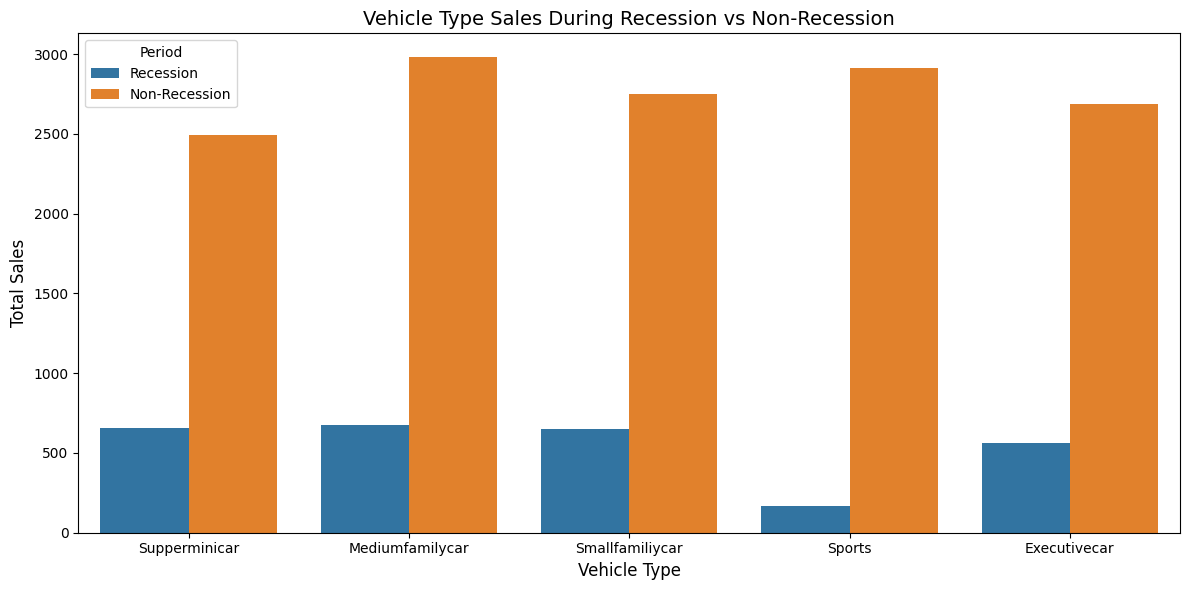

In [14]:
import seaborn as sns

# Create a column to label each row as 'Recession' or 'Non-Recession'
df['Recession_Label'] = df['Recession'].apply(lambda x: 'Recession' if x == 1 else 'Non-Recession')

# Create a seaborn barplot comparing vehicle type sales during recession vs non-recession
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Vehicle_Type', y='Automobile_Sales', hue='Recession_Label', ci=None)

plt.title("Vehicle Type Sales During Recession vs Non-Recession", fontsize=14)
plt.xlabel("Vehicle Type", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.legend(title="Period")
plt.tight_layout()
plt.savefig("Bar_Chart_1.png")
plt.show()

Task 1.4: GDP Trends - Recession vs Non-Recession (Subplots)

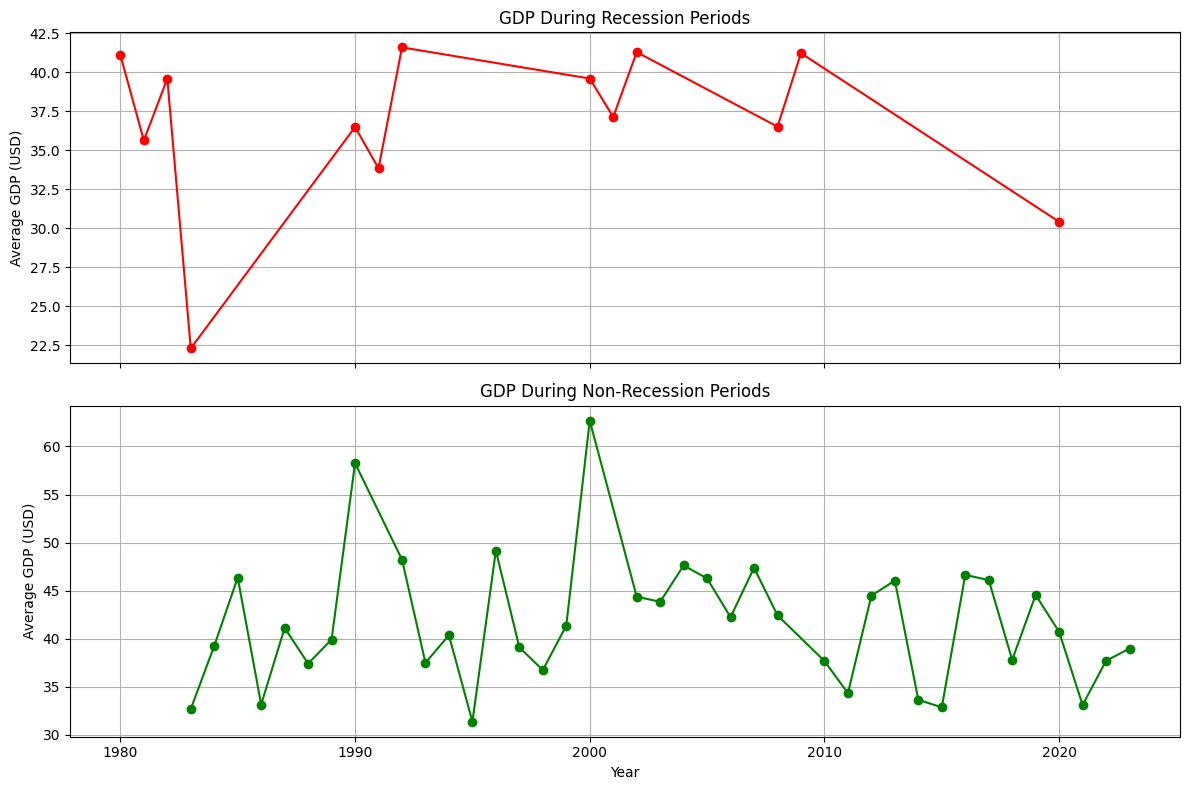

In [15]:
# Split data into recession and non-recession
df_recession = df[df['Recession'] == 1]
df_non_recession = df[df['Recession'] == 0]

# Group by Year and get average GDP
gdp_recession = df_recession.groupby('Year')['GDP'].mean().reset_index()
gdp_non_recession = df_non_recession.groupby('Year')['GDP'].mean().reset_index()

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Recession subplot
axes[0].plot(gdp_recession['Year'], gdp_recession['GDP'], marker='o', color='red')
axes[0].set_title("GDP During Recession Periods")
axes[0].set_ylabel("Average GDP (USD)")
axes[0].grid(True)

# Non-recession subplot
axes[1].plot(gdp_non_recession['Year'], gdp_non_recession['GDP'], marker='o', color='green')
axes[1].set_title("GDP During Non-Recession Periods")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Average GDP (USD)")
axes[1].grid(True)

plt.tight_layout()
plt.savefig("Line_Subplot_GDP.png")
plt.show()

Task 1.5: Bubble Plot - Seasonality Impact on Automobile Sales

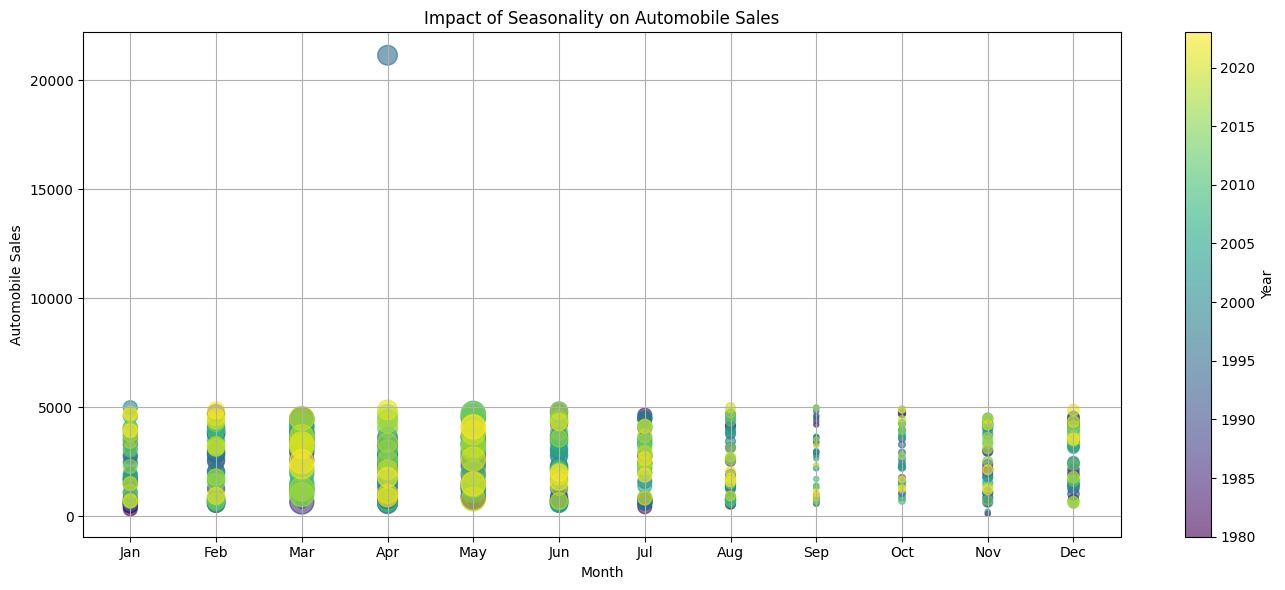

In [16]:
# Use a subset of relevant columns for clarity
bubble_data = df[['Year', 'Month', 'Automobile_Sales', 'Seasonality_Weight']].copy()

# Create a bubble plot
plt.figure(figsize=(14, 6))
scatter = plt.scatter(
    x=bubble_data['Month'],
    y=bubble_data['Automobile_Sales'],
    s=bubble_data['Seasonality_Weight'] * 200,  # Bubble size
    alpha=0.6,
    c=bubble_data['Year'],
    cmap='viridis'
)

plt.colorbar(scatter, label='Year')
plt.title("Impact of Seasonality on Automobile Sales")
plt.xlabel("Month")
plt.ylabel("Automobile Sales")
plt.grid(True)
plt.tight_layout()
plt.savefig("Bubble_Plot_Seasonality.png")
plt.show()

Task 1.6: Scatter Plot - Price vs Automobile Sales During Recession

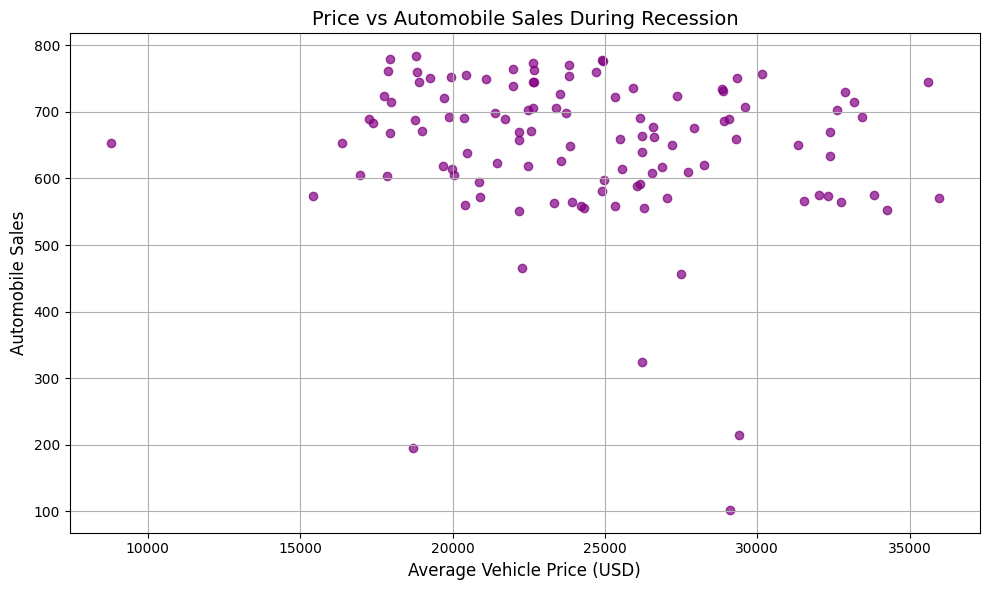

In [17]:
# Filter for recession periods only
recession_data = df[df['Recession'] == 1]

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(
    recession_data['Price'],
    recession_data['Automobile_Sales'],
    alpha=0.7,
    color='purple'
)

plt.title("Price vs Automobile Sales During Recession", fontsize=14)
plt.xlabel("Average Vehicle Price (USD)", fontsize=12)
plt.ylabel("Automobile Sales", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig("Scatter_Plot_Recession_Price_Sales.png")
plt.show()

Task 1.7: Pie Chart - Advertising Expenditure During Recession vs Non-Recession

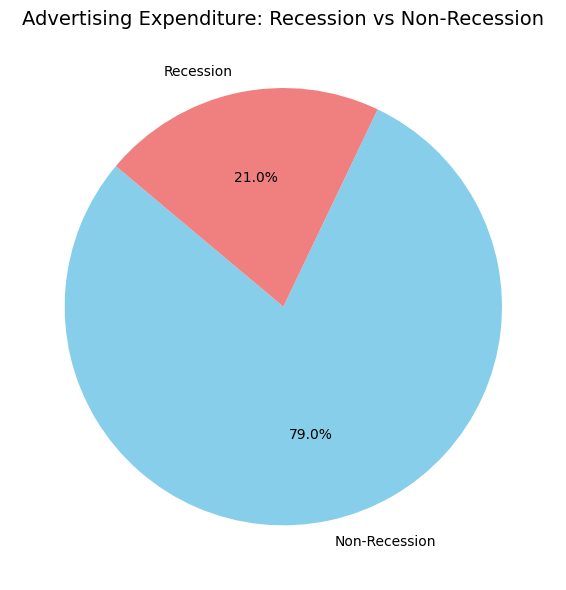

In [18]:
# Sum of advertising expenditure grouped by recession status
ad_exp_by_period = df.groupby('Recession')['Advertising_Expenditure'].sum()
labels = ['Non-Recession', 'Recession']

# Pie chart
plt.figure(figsize=(8, 6))
plt.pie(ad_exp_by_period, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title("Advertising Expenditure: Recession vs Non-Recession", fontsize=14)
plt.tight_layout()
plt.savefig("Pie_Chart_Advertising_Recession.png")
plt.show()

Task 1.8: Pie Chart - Advertisement Spend by Vehicle Type During Recession

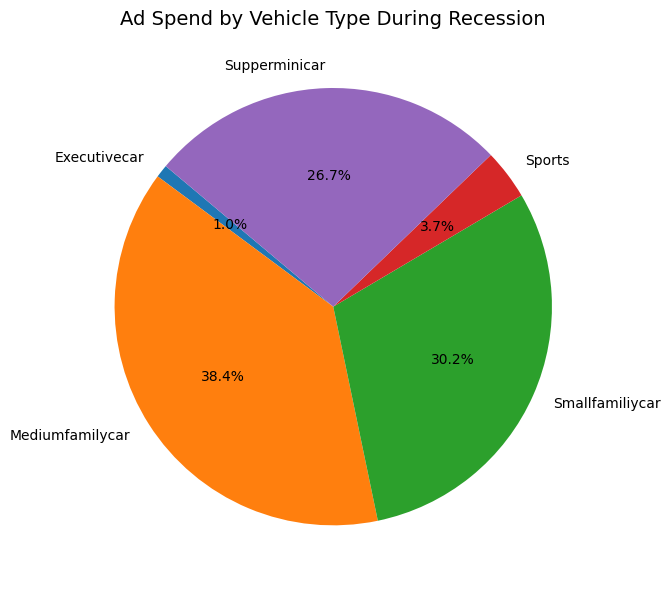

In [19]:
# Filter for recession data
recession_only = df[df['Recession'] == 1]

# Group by Vehicle_Type and sum advertising expenditure
ad_exp_by_vehicle = recession_only.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Pie chart
plt.figure(figsize=(8, 6))
plt.pie(ad_exp_by_vehicle, labels=ad_exp_by_vehicle.index, autopct='%1.1f%%', startangle=140)
plt.title("Ad Spend by Vehicle Type During Recession", fontsize=14)
plt.tight_layout()
plt.savefig("Pie_Chart_AdSpend_VehicleType_Recession.png")
plt.show()

Task 1.9: Lineplot - Unemployment Rate vs Vehicle Sales During Recession

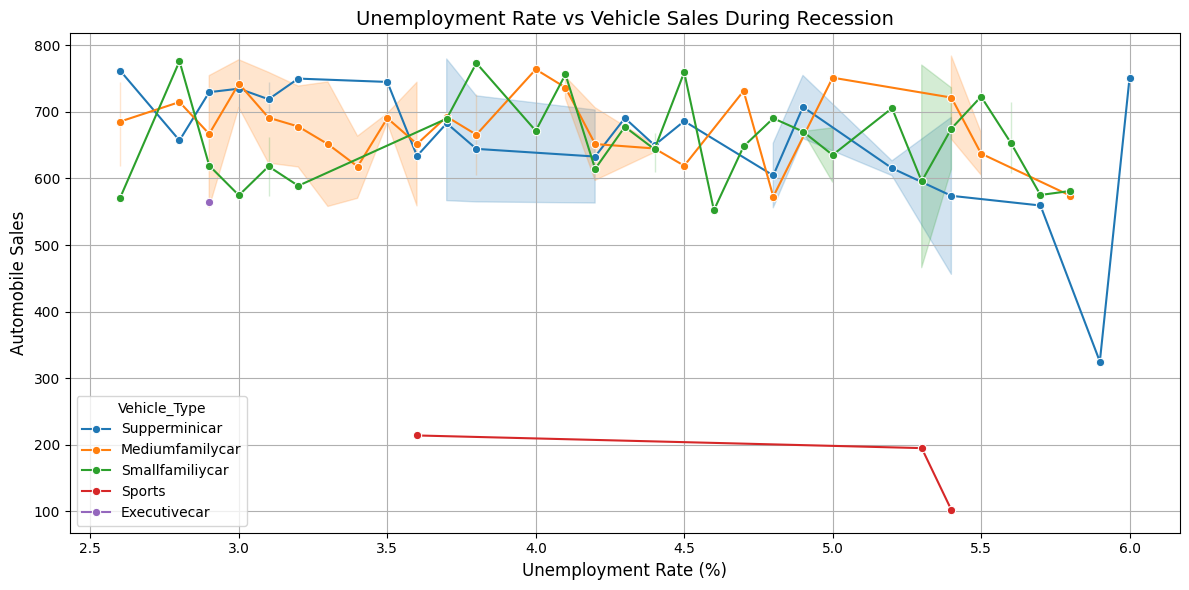

In [20]:
# Filter data for recession only
recession_data = df[df['Recession'] == 1]

# Create a lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(data=recession_data, x='unemployment_rate', y='Automobile_Sales', hue='Vehicle_Type', marker='o')

plt.title("Unemployment Rate vs Vehicle Sales During Recession", fontsize=14)
plt.xlabel("Unemployment Rate (%)", fontsize=12)
plt.ylabel("Automobile Sales", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig("Lineplot_Unemployment_VehicleSales_Recession.png")
plt.show()